In [20]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

In [21]:
# Start the timer
start_time = time.time()

# Load the Dataset

In [22]:
df = pd.read_csv('Data/2022-2023_Football_Players_stats.csv')

In [23]:
# Display the data
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon/90,AerLost,AerDuels/90,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,1.53,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,3.41,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,1.98,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,1.00,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,0.70,44.4


In [24]:
# Descriptive statistics
df.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon/90,AerLost,AerDuels/90,AerWon%
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,...,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,1345.000000,26.011157,1996.155820,11.833023,8.476013,760.451097,8.450465,1.027520,1.245787,0.411261,...,1.661636,0.990569,0.009249,0.015173,0.003142,4.951967,1.312064,1.497356,2.809420,43.583600
std,776.391761,4.446259,4.450108,6.864278,6.994383,591.094260,6.567484,2.013714,1.424619,0.754716,...,2.319000,1.235965,0.043781,0.077399,0.022607,2.901833,1.579539,1.830391,2.887727,26.673092
min,1.000000,15.000000,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,673.000000,23.000000,1993.000000,5.000000,2.000000,194.000000,2.200000,0.000000,0.260000,0.000000,...,0.000000,0.300000,0.000000,0.000000,0.000000,3.330000,0.330000,0.550000,1.140000,27.600000
50%,1345.000000,26.000000,1996.000000,13.000000,7.000000,684.000000,7.600000,0.000000,0.860000,0.180000,...,0.760000,0.830000,0.000000,0.000000,0.000000,5.000000,0.930000,1.100000,2.220000,46.400000
75%,2017.000000,29.000000,2000.000000,18.000000,14.000000,1245.000000,13.800000,1.000000,1.850000,0.590000,...,2.500000,1.320000,0.000000,0.000000,0.000000,6.270000,1.790000,1.830000,3.600000,60.000000
max,2689.000000,41.000000,2007.000000,23.000000,23.000000,2070.000000,23.000000,25.000000,15.000000,10.000000,...,30.000000,20.000000,0.870000,2.000000,0.500000,30.000000,25.000000,30.000000,40.000000,100.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_34792\1005659808.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

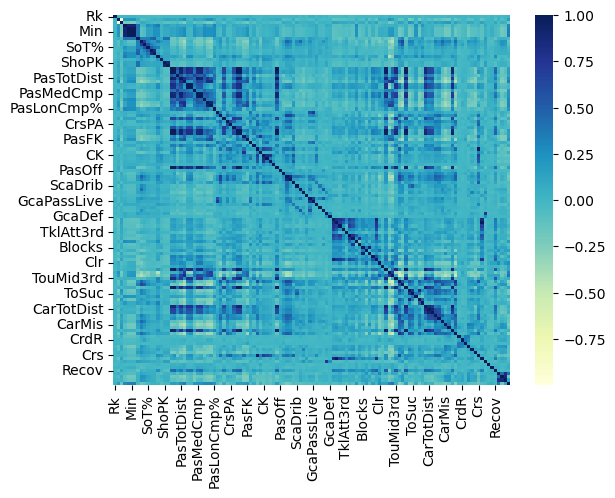

In [25]:
# Correlation Matrix to identify any correlations between KPI columns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [26]:
# Shape of the data

df.shape

(2689, 133)

In [27]:
# Taking subset of the dataset

df=df.iloc[:3000,0:]

In [28]:
# Check the datatype

df.dtypes

Rk               int64
Player          object
Nation          object
Pos             object
Squad           object
                ...   
Recov          float64
AerWon/90      float64
AerLost        float64
AerDuels/90    float64
AerWon%        float64
Length: 133, dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 133 entries, Rk to AerWon%
dtypes: float64(113), int64(7), object(13)
memory usage: 2.7+ MB


# Check and handling missing values

In [30]:
# Check for missing values

print('Number of missing values across columns: \n',df.isnull().sum())

Number of missing values across columns: 
 Rk             0
Player         0
Nation         1
Pos            0
Squad          0
              ..
Recov          0
AerWon/90      0
AerLost        0
AerDuels/90    0
AerWon%        0
Length: 133, dtype: int64


## Model-based collaborative filtering using Euclidean distance in 2022-2023 dataset

In [31]:
# Define a dict to map the KPI columns to their names
kpi_columns = {
    'Tkl/90': 'Tkl/90',
    'TklWon%': 'TklWon%',
    'TklDriPast': 'TklDriPast',
    'BlkSh/90': 'BlkSh/90',
    'Int/90': 'Int/90',
    'Clr/90': 'Clr/90',
    'AerDuels/90': 'AerDuels/90',
    'AerWon%': 'AerWon%',
    'PasTotAtt/90': 'PasTotAtt/90',
    'PasTotCmp%': 'PasTotCmp%',
    'PasLonAtt/90': 'PasLonAtt/90',
    'PasLonCmp%': 'PasLonCmp%',
}

# Select the columns for the KPIs and for the player names
kpi_data = df[list(kpi_columns.values())].apply(pd.to_numeric, errors='coerce').fillna(0).values
player_names = df['Player'].values

# Normalize the KPI data using MinMaxScaler
scaler = MinMaxScaler()
kpi_data_norm = scaler.fit_transform(kpi_data)

# Define a function to compute the Euclidean distance between two players
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Find the player who is most similar to a given player
target_player = 'Virgil van Dijk'
target_data = kpi_data_norm[np.where(player_names == target_player)[0][0]]
distances = [euclidean(target_data, row) for row in kpi_data_norm]
most_similar_indices = np.argsort(distances)[1:11]

# Print the head of the list of the 10 most similar players
similar_players = []
for idx in most_similar_indices:
    row = df.iloc[idx]
    row_values = [row['Player'] ,row['Pos'], row['Squad'], row['Age']] + [kpi_data_norm[idx, j] for j in range(len(kpi_columns))]
    similar_players.append(row_values)

similar_players_df = pd.DataFrame(similar_players, columns=['Player','Pos', 'Squad', 'Age'] + list(kpi_columns.values()))
print(similar_players_df.head(10))

                Player Pos            Squad  Age    Tkl/90  TklWon%  \
0    Benoît Badiashile  DF          Chelsea   21  0.001875   0.3333   
1     Fodé Ballo-Touré  DF            Milan   26  0.005159   0.1982   
2  Oleksandr Zinchenko  DF          Arsenal   26  0.000800   0.3906   
3       Iñigo Martínez  DF    Athletic Club   31  0.000494   0.3708   
4         Malick Thiaw  DF       Schalke 04   21  0.001667   0.3300   
5        Houssem Aouar  MF             Lyon   24  0.001978   0.3764   
6        Giulio Donati  DF            Monza   33  0.003479   0.2515   
7          Jonny Evans  DF   Leicester City   35  0.000617   0.3964   
8          Joe Worrall  DF  Nott'ham Forest   26  0.000827   0.4087   
9         Roger Ibanez  DF             Roma   24  0.000555   0.4721   

   TklDriPast  BlkSh/90    Int/90    Clr/90  AerDuels/90  AerWon%  \
0       0.050  0.000625  0.002500  0.006875      0.12500    0.800   
1       0.000  0.004136  0.002045  0.001023      0.04525    0.750   
2       0.0

## Under 25 years old most similar players

In [32]:
kpi_columns = {
    'Tkl/90': 'Tkl/90',
    'TklWon%': 'TklWon%',
    'TklDriPast': 'TklDriPast',
    'BlkSh/90': 'BlkSh/90',
    'Int/90': 'Int/90',
    'Clr/90': 'Clr/90',
    'AerDuels/90': 'AerDuels/90',
    'AerWon%': 'AerWon%',
    'PasTotAtt/90': 'PasTotAtt/90',
    'PasTotCmp%': 'PasTotCmp%',
    'PasLonAtt/90': 'PasLonAtt/90',
    'PasLonCmp%': 'PasLonCmp%',
}

# Select the columns for the KPIs and for the player names
kpi_data = df[list(kpi_columns.values())].apply(pd.to_numeric, errors='coerce').fillna(0).values
player_names = df['Player'].values
player_ages = df['Age'].values

# Normalize the KPI data using MinMaxScaler
scaler = MinMaxScaler()
kpi_data_norm = scaler.fit_transform(kpi_data)

# Define a function to compute the Euclidean distance between two players
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Find the player who is most similar to VVD
target_player = 'Virgil van Dijk'
target_data = kpi_data_norm[np.where(player_names == target_player)[0][0]]
distances = [euclidean_distance(target_data, row) for row in kpi_data_norm]

# Get the indices of players who are 25 or younger
young_player_indices = np.where(player_ages <= 25)[0]

# Get the indices of the most similar young players
most_similar_indices = np.argsort([distances[idx] for idx in young_player_indices])[:10]

# Print the head of the list of the 10 most similar young players
similar_players = []
for idx in most_similar_indices:
    player_idx = young_player_indices[idx]
    row = df.iloc[player_idx]
    row_values = [row['Player'] ,row['Pos'], row['Squad'], row['Age']] + [kpi_data_norm[player_idx, j] for j in range(len(kpi_columns))]
    similar_players.append(row_values)

similar_players_df = pd.DataFrame(similar_players, columns=['Player','Pos', 'Squad', 'Age'] + list(kpi_columns.values()))
print(similar_players_df.head(10))

               Player   Pos       Squad  Age    Tkl/90  TklWon%  TklDriPast  \
0   Benoît Badiashile    DF     Chelsea   21  0.001875   0.3333       0.050   
1        Malick Thiaw    DF  Schalke 04   21  0.001667   0.3300       0.033   
2       Houssem Aouar    MF        Lyon   24  0.001978   0.3764       0.044   
3        Roger Ibanez    DF        Roma   24  0.000555   0.4721       0.033   
4      Julian Ryerson    DF    Dortmund   25  0.002500   0.2500       0.025   
5       Batista Mendy  MFDF      Angers   23  0.000617   0.4234       0.044   
6          Pape Gueye  MFDF   Marseille   24  0.002973   0.3884       0.145   
7                Dodô    DF  Fiorentina   24  0.000515   0.4485       0.053   
8  Alessandro Bastoni    DF       Inter   23  0.000628   0.4802       0.043   
9        Aleix García    MF      Girona   25  0.000328   0.4060       0.039   

   BlkSh/90    Int/90    Clr/90  AerDuels/90  AerWon%  PasTotAtt/90  \
0  0.000625  0.002500  0.006875      0.12500    0.800      

## Model-based collaborative filtering using Euclidean distance in 2021-2022 dataset to compare peak-form Van Dick to this season players

In [33]:
# Read in the KPI data for both seasons
df_2021 = pd.read_csv('Data/2021-2022_Virgil_van_Dijk_stats.csv')
df_2022 = pd.read_csv('Data/2022-2023_Football_Players_stats.csv')

# Define a dict to map the KPI columns to their names
kpi_columns = {
    'Tkl/90': 'Tkl/90',
    'TklWon%': 'TklWon%',
    'TklDriPast': 'TklDriPast',
    'BlkSh/90': 'BlkSh/90',
    'Int/90': 'Int/90',
    'Clr/90': 'Clr/90',
    'AerDuels/90': 'AerDuels/90',
    'AerWon%': 'AerWon%',
    'PasTotAtt/90': 'PasTotAtt/90',
    'PasTotCmp%': 'PasTotCmp%',
    'PasLonAtt/90': 'PasLonAtt/90',
    'PasLonCmp%': 'PasLonCmp%',
}

# Select the columns for the KPIs and for the player names for each season
kpi_data_2021 = df_2021[list(kpi_columns.values())].apply(pd.to_numeric, errors='coerce').fillna(0).values
player_names_2021 = df_2021['Player'].values

kpi_data_2022 = df_2022[list(kpi_columns.values())].apply(pd.to_numeric, errors='coerce').fillna(0).values
player_names_2022 = df_2022['Player'].values

# Normalize the KPI data using MinMaxScaler for each season
scaler_2021 = MinMaxScaler()
kpi_data_2021_norm = scaler_2021.fit_transform(kpi_data_2021)

scaler_2022 = MinMaxScaler()
kpi_data_2022_norm = scaler_2022.fit_transform(kpi_data_2022)

# Define a function to compute the Euclidean distance between two players
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Find the player who is most similar to the 2021-2022 Virgil van Dijk using the 2022-2023 KPI data
target_player = 'Virgil van Dijk'
target_data_2021 = kpi_data_2021_norm[np.where(player_names_2021 == target_player)[0][0]]
target_data_2022 = kpi_data_2022_norm[np.where(player_names_2022 == target_player)[0][0]]
distances_2022 = [euclidean_distance(target_data_2022, row) for row in kpi_data_2022_norm]
most_similar_indices_2022 = np.argsort(distances_2022)[1:11]

# Print the head of the list of the 10 most similar players based on the 2022-2023 KPI data
similar_players_2022 = []
for idx in most_similar_indices_2022:
    player_name = player_names_2022[idx]
    distance = distances_2022[idx]
    similar_players_2022.append((player_name, distance))

print("Top 10 most similar players to {} based on 2022-2023 KPI data:".format(target_player))
print(similar_players_df.head(10))

Top 10 most similar players to Virgil van Dijk based on 2022-2023 KPI data:
               Player   Pos       Squad  Age    Tkl/90  TklWon%  TklDriPast  \
0   Benoît Badiashile    DF     Chelsea   21  0.001875   0.3333       0.050   
1        Malick Thiaw    DF  Schalke 04   21  0.001667   0.3300       0.033   
2       Houssem Aouar    MF        Lyon   24  0.001978   0.3764       0.044   
3        Roger Ibanez    DF        Roma   24  0.000555   0.4721       0.033   
4      Julian Ryerson    DF    Dortmund   25  0.002500   0.2500       0.025   
5       Batista Mendy  MFDF      Angers   23  0.000617   0.4234       0.044   
6          Pape Gueye  MFDF   Marseille   24  0.002973   0.3884       0.145   
7                Dodô    DF  Fiorentina   24  0.000515   0.4485       0.053   
8  Alessandro Bastoni    DF       Inter   23  0.000628   0.4802       0.043   
9        Aleix García    MF      Girona   25  0.000328   0.4060       0.039   

   BlkSh/90    Int/90    Clr/90  AerDuels/90  AerWon% 

In [34]:
# Calculate Mean, Median, and Standard Deviation of 'Tkl/90' KPI Column
tkl_col = df['Tkl/90'].apply(pd.to_numeric, errors='coerce').fillna(0)
mean_tkl = tkl_col.mean()
median_tkl = tkl_col.median()
std_tkl = tkl_col.std()

print('Mean Tkl/90:', mean_tkl)
print('Median Tkl/90:', median_tkl)
print('Standard Deviation Tkl/90:', std_tkl)

Mean Tkl/90: 1.8800869328994823
Median Tkl/90: 0.1504132231
Standard Deviation Tkl/90: 12.207425727951167


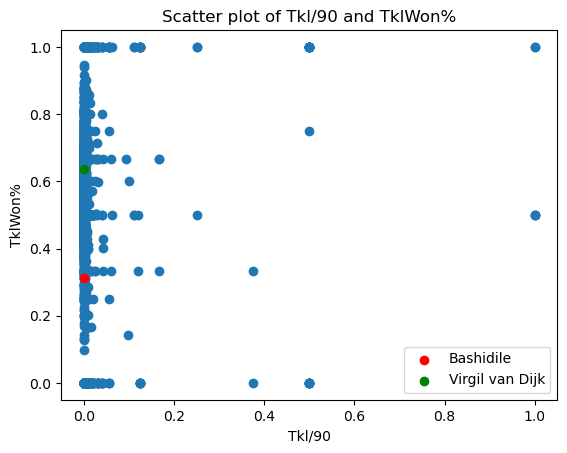

In [35]:
# Create a scatter plot of 'Tkl/90' and 'TklWon%' KPI columns
tkl_90 = kpi_data_norm[:, 0]
tkl_won = kpi_data_norm[:, 1]
plt.scatter(tkl_90, tkl_won)
plt.xlabel('Tkl/90')
plt.ylabel('TklWon%')
plt.title('Scatter plot of Tkl/90 and TklWon%')

plt.scatter(tkl_90[0], tkl_won[0], color='red', label='Bashidile')
plt.scatter(tkl_90[1], tkl_won[1], color='green', label='Virgil van Dijk')
plt.legend()
plt.show()

In [36]:
# Calculate the running time
print("--- %s seconds ---" % (time.time() - start_time))


--- 1.7769951820373535 seconds ---
